# 1. Domain Proyek
Proyek yang dikembangkan adalah sistem rekomendasi terhadap judul film berdasarkan rating yang telah diberikan pengguna yang diperoleh dari website penyedia dataset, Kaggle. Permasalahan yang diselesaikan dalam proyek ini adalah supaya pengguna dapat memdapatkan rekomendasi film yang memilikii kemiripan dengan preferensi pengguna di masa lalu [[1]](https://www.dicoding.com/academies/319/tutorials/19662). Teknik ini disebut dengan *collaborative filtering*.

# 2. Business Understanding
## 2.1 Problem statements
- Bagaimana membuat model yang memungkinkan untuk memberikan rekomendasi kepada pengguna?
- Bagaimana membuat sistem rekomendasi yang dapat memberikan rekomendasi berdasarkan kemiripan preferensi pengguna?

## 2.2 Goals
- Memberikan rekomendasi sejumlah judul film yanf sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumya.
- Mengidentifikasi judul-judul film yang mirip dan belum pernah dikunjungi oleh pengguna untuk direkomendasikan.

## 2.3 Solution statements
Untuk mencapai tujuan, masalah ini dapat diselesaikan dengan menerapkan teknsik yang disebut dengan *collaborative filtering*. metode ini menghasilkan rekomendasi berdasarkan pola penggunaan tanpa memerlukan informasi eksogen tentang item atau pengguna [[2]](https://link.springer.com/chapter/10.1007/978-1-0716-2197-4_3). Algoritma CF telah menunjukkan kualitas prediksi yang bagus baik dalam penelitian akademis maupun dalam aplikasi industri. Kualitas rekomendasi yang diberikan dengan menggunakan metode ini sangat bergantung dari opini pengguna lain (neighbor) terhadap suatu item. Belakangan diketahui bahwa melakukan reduksi neighbor (yaitu dengan memotong neighbor sehingga hanya beberapa pengguna yang memiliki kesamaan / similiarity tertinggi sajalah yang akan digunakan dalam perhitungan) mampu meningkatkan kualitas rekomendasi yang diberikan [[3]](http://www.jurnal.stmik-mi.ac.id/index.php/jcb/article/view/167/189).

# 3. Data Understanding
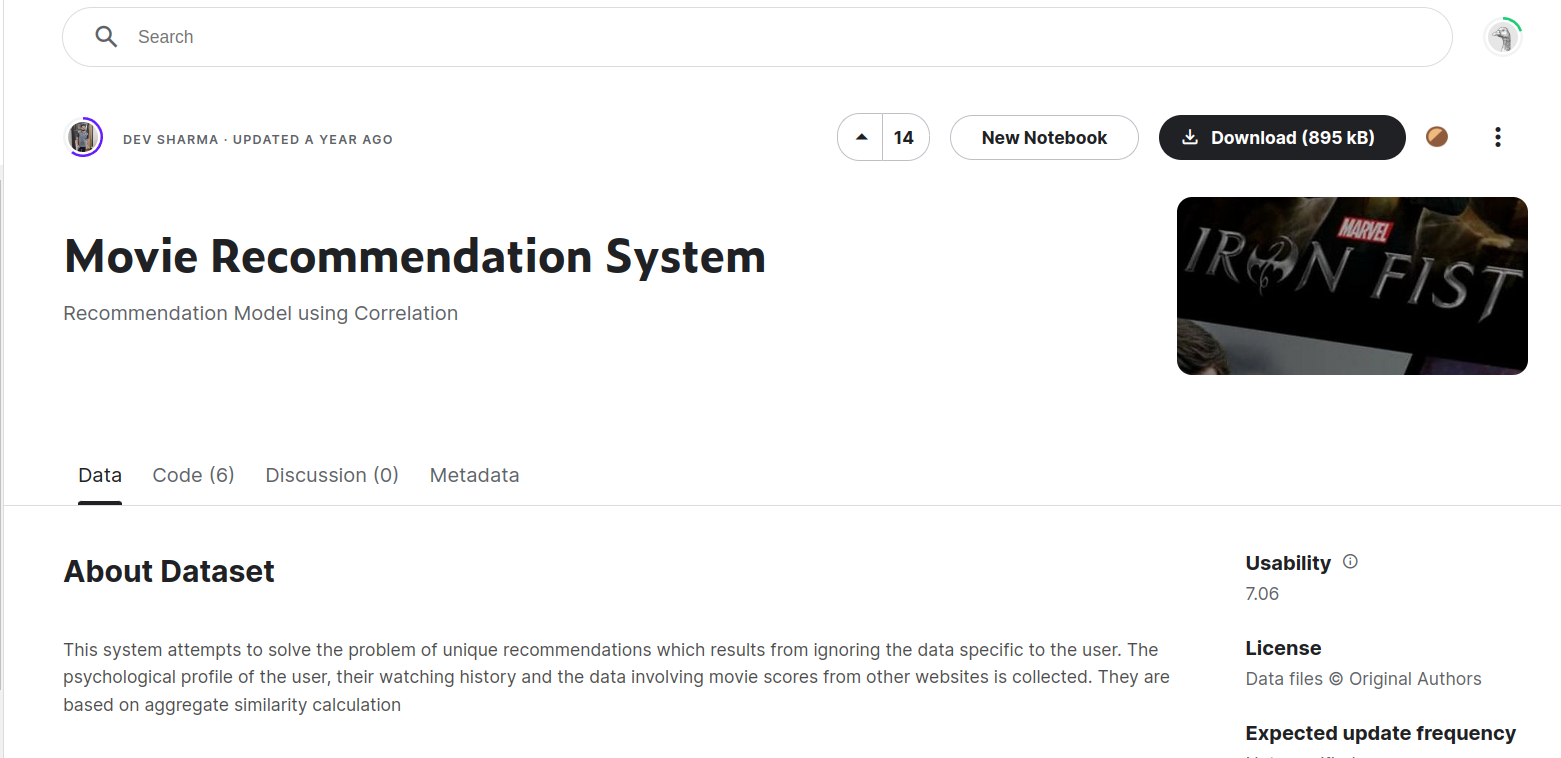
Dataset yang digunakan adalah data [Movie Recommendation System](https://www.kaggle.com/datasets/dev0914sharma/dataset) yang memiliki 2 buah dataset, yaitu **Dataset.csv** dan **Movie_Id_Titles.csv**.

- **Dataset.csv**
    
    Dataset ini memiliki 4 kolom dan 100003 baris data. Diantaranya adalah sebagai berikut.
    - **user_id** merupakan id dari pengguna yang memberikan rating kepada film.
    - **item_id** meruoakan id dari film yang diberikan rating oleh pengguna.
    - **rating** merupakan rating atau penilaian yang diberikan oleh pengguna kepada film yang dipilih.
    - **timestamp** merupakan waktu kapan pengguna memberikan penilaiian kepada film.

- **Movie_Id_Titles.csv**.

    Dataset ini memiliki 2 kolom dan 1682 baris data. Diantaranya adalah sebagai berikut.
    - **item_id** merupakan id dari film yang tersedia.
    - **title** meruakan judul film yang tersedia.


# 4. Data Loading

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [2]:
rating = pd.read_csv('https://raw.githubusercontent.com/Dikihmd01/Applied-ML/main/dataset/recom_dataset.csv')
movie = pd.read_csv('https://raw.githubusercontent.com/Dikihmd01/Applied-ML/main/dataset/recom_movie_id_titles.csv')

In [3]:
print("Jumlah data movie: ", len(movie.item_id.unique()))
print("Jumlah data penilaian movie: ", len(rating.item_id.unique()))

Jumlah data movie:  1682
Jumlah data penilaian movie:  1682


# 5. Univariate Explanatory Data Analysis
Variabel-variabel pada Restaurant UCI dataset adalah sebagai berikut:

- **rating** : merupakan penilaian movie yang diberikan oleh pengguna.
- **movie** : merupakanjudul movie yang tersedia.

Pada tahap ini, akan dilakukan explorasi terhadap variabel-variabel tersebut.

## 5.1 Movie

In [36]:
movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


Dari hasil di atas, dapat diketahui bahwa dataset movie ini memiliki 2 kolom dengan 1682 baris data. Data yang lumyan banyak, di mana tipe data **item_id** adalah numerik dan **title** adalah kategori.

## 5.2 Rating

In [37]:
rating

,user_id,item_id,rating,timestamp,user,movie
96798,465,835,3.0,883531026,465,625
64061,763,56,5.0,878919116,759,218
42096,614,255,5.0,879464119,610,179
27674,119,1260,5.0,874781547,21,679
16693,387,1143,5.0,886480623,380,1219
...,...,...,...,...,...,...
57651,94,658,3.0,891722533,91,124
83984,892,90,2.0,886610078,888,778
40753,517,1,3.0,892659892,528,27
19776,181,925,2.0,878963418,36,970


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


Dari hasil di atas, dapat diketahui bahwa dataset rating ini memiliki 4 kolom dengan 100003 baris data. Data yang sangat banyak, di mana tipe data pada semua fitur adalah numerik.

In [8]:
rating.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


Berdarkan hasil di atas, maka dapat diketahui nilai minimal rating adalah 1 dan nilai maksimal rating adalah 5. Sehingga, dapat disimpulkan skala penilaian adalah 1 sampai 5.

# Data Preprocessing
Pada tahap ini, yang harus dilakukan adalah menggabungkan 2 dataset yang terpisah berdasarkan item_id. Sehingga data tersebut siap digunakan ke tahap *preparation*.

In [9]:
movies = pd.merge(movie, rating, on='item_id')
movies

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


In [10]:
movies['rating'].value_counts()

4    34174
3    27145
5    21203
2    11370
1     6111
Name: rating, dtype: int64

Dari hasil pengecekkan nilai pada fitur rating, penilaian 1 memiliki jumlah paling sedikit dan nilai 4 dengan jumlah terbanyak. Hal ini menunjukkan bahwa judul-judul film yang tersedia disi oleh film-film yang cukup menarik bagi pengguna.

In [11]:
movies.isnull().sum()

item_id      0
title        0
user_id      0
rating       0
timestamp    0
dtype: int64

Setelah melakukan pengecekan *missing value*, dapat diketahui bahwa dataset ini tidak memiliki *misisng value* sehingga dapat lanjut ke tahap persiapan data.

# 6. Data Preparation
Langkah pertama pada proses persiapan data adalah dengan melakukan *grouping* berdarkan judul dan rating dengan mengurutkan secara *descending*.

In [12]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

Setelah dilakukan *grouping*, selanjutnya *assign* ke dalam variabel baru.

In [13]:
fix_movie = movies.sort_values('item_id', ascending=True)
fix_movie

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
308,1,Toy Story (1995),303,5,879466966
307,1,Toy Story (1995),886,4,876031433
306,1,Toy Story (1995),789,3,880332089
305,1,Toy Story (1995),295,4,879517580
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


In [14]:
print(len(fix_movie.item_id.unique()))

1682


Daset yang telah ditetapkan ini memiliki jumah data sebanyak yang unik adalah 1682 baris.

In [15]:
fix_movie.title.unique()

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'B. Monkey (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)

In [16]:
preparation = fix_movie
preparation.sort_values('item_id')

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
11,1,Toy Story (1995),145,3,882181396
225,1,Toy Story (1995),371,4,877487440
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


In [17]:
preparation = preparation.drop_duplicates('item_id')
preparation

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
536,2,GoldenEye (1995),846,5,883948949
641,3,Four Rooms (1995),751,3,889299391
814,4,Get Shorty (1995),875,3,876466687
944,5,Copycat (1995),925,4,884718156
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


Setelah melakukan *drop duplicate*, data yang disiapkan menjadi 1682 baris. Selanjutnya adalah menkonversi data series menjadi list

In [18]:
movie_id = preparation['item_id'].tolist()
movie_title = preparation['title'].tolist()

print(len(movie_id))
print(len(movie_title))

1682
1682


Telah dibuat 2 variabel baru dengan masing-masing panjangnya dalah 1682 data. Selanjutnya adalah *assign* 2 variabel baru tersebut ke dalam dictionary untuk dijadikan DataFrame fram dengan **movie_new**.

In [19]:
# Membuat dictionary
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': movie_title
})

movie_new

,id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [20]:
# Mengubah ID menjadi list yang unique
user_ids = rating['user_id'].unique().tolist()
print("List user_id: ", user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id: ', user_to_user_encoded)

# Melakukan proses encoding anka ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("encoded angka ke user_id: ", user_encoded_to_user)

List user_id:  [0, 196, 186, 22, 244, 166, 298, 115, 253, 305, 6, 62, 286, 200, 210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308, 95, 38, 102, 63, 160, 50, 301, 225, 290, 97, 157, 181, 278, 276, 7, 10, 284, 201, 287, 246, 242, 249, 99, 178, 251, 81, 260, 25, 59, 72, 87, 42, 292, 20, 13, 138, 60, 57, 223, 189, 243, 92, 241, 254, 293, 127, 222, 267, 11, 8, 162, 279, 145, 28, 135, 32, 90, 216, 250, 271, 265, 198, 168, 110, 58, 237, 94, 128, 44, 264, 41, 82, 262, 174, 43, 84, 269, 259, 85, 213, 121, 49, 155, 68, 172, 19, 268, 5, 80, 66, 18, 26, 130, 256, 1, 56, 15, 207, 232, 52, 161, 148, 125, 83, 272, 151, 54, 16, 91, 294, 229, 36, 70, 14, 295, 233, 214, 192, 100, 307, 297, 193, 113, 275, 219, 218, 123, 158, 302, 23, 296, 33, 154, 77, 270, 187, 170, 101, 184, 112, 133, 215, 69, 104, 240, 144, 191, 61, 142, 177, 203, 21, 197, 134, 180, 236, 263, 109, 64, 114, 239, 117, 65, 137, 257, 111, 285, 96, 116, 73, 221, 235, 164, 281, 182, 129, 45, 131, 230, 126, 231, 280, 288, 152, 217, 79, 75

In [21]:
# Mengubah item_id menjadi list yang unique
movie_ids = rating['item_id'].unique().tolist()

# Melakukan proses encoding item_id
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke item_id
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [22]:
# Mapping user_id ke dataframe user
rating['user'] = rating['user_id'].map(user_to_user_encoded)

# Mapping item_id ke dataframe movie
rating['movie'] = rating['item_id'].map(movie_to_movie_encoded)

In [23]:
# Cek jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Cek jumlah movie
num_movie = len(movie_to_movie_encoded)
print(num_movie)

# Mengubah string menjadi nilai float
rating['rating'] = rating['rating'].values.astype(np.float32)

# Nilai min, rating
min_rating = min(rating['rating'])

# Nilai max. rating
max_rating = max(rating['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

944
1682
Number of User: 944, Number of Movie: 1682, Min Rating: 1.0, Max Rating: 5.0


Dari hasil persiapan data, maka diperoeh informasi sebagai berikut.

- Jumlah pengguna sebanyak 944  .
- Jumlah judul film sebanyak 1682.
- Minimal penilaian yang diterima adalah 1.0.
- Maksimlam penilaian yang diterima adalah 5.0
- Skala penilaian film adalah 1-5.

## 6.1 Split Dataset

Membagi dataset dengan komposisi 80:20. Sebelum itu, diperlukkan mapping data user dan resto menjadi satu nilai terlebih dahulu. Lalu, membuat rating dalam sekala 0 - 1 agar mempermudah dalam proses training.

In [24]:
rating = rating.sample(frac=1, random_state=43)
rating

,user_id,item_id,rating,timestamp,user,movie
96798,465,835,3.0,883531026,465,625
64061,763,56,5.0,878919116,759,218
42096,614,255,5.0,879464119,610,179
27674,119,1260,5.0,874781547,21,679
16693,387,1143,5.0,886480623,380,1219
...,...,...,...,...,...,...
57651,94,658,3.0,891722533,91,124
83984,892,90,2.0,886610078,888,778
40753,517,1,3.0,892659892,528,27
19776,181,925,2.0,878963418,36,970


In [40]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu nilai
x = rating[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data training dan 20% data validasi
train_indices = int(0.8 * rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)
print(f"\nx train shape: {x_train.shape}")
print(f"x val shape: {x_val.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y val shape: {y_val.shape}")

[[465 625]
 [759 218]
 [610 179]
 ...
 [528  27]
 [ 36 970]
 [403 463]] [0.5  1.   1.   ... 0.5  0.25 0.  ]

x train shape: (80002, 2)
x val shape: (20001, 2)
y train shape: (80002,)
y val shape: (20001,)


Dari proses di aras, dataset telah dibagi dengan komposisi 80% data training dan 20% data validasi.

# 7. Modelling
Pada tahap ini, model menghitung skor kecocokan antara pengguna dengan teknik embedding.

1. Melakukan proses embedding terhadap data user dan film.
2. Melakukan operasi perkalian dot product antara embedding user dan film.
3. Dapat juga dengan menambahkan bias untuk setiap user dan film.
4. Skor kecocokan ditetapkan dalam skala [0, 1] dengan fungsi aktivasi sigmoid.

In [26]:
class RecommenderNet(tf.keras.Model):
    
    # init fungsi
    def __init__(self, num_users, num_movie, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movie = num_movie
        self.embedding_size = embedding_size
        
        # Layer Embedding users
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )

        # Layer embedding user bias
        self.user_bias = layers.Embedding(num_users, 1)

        # Layer Embedding movie
        self.movie_embedding = layers.Embedding(
            num_movie,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )

        # Layer embedding movie bias
        self.movie_bias = layers.Embedding(num_movie, 1)
    
    def call(self, inputs):
        # Memanggillayaer embedding 1
        user_vector = self.user_embedding(inputs[:, 0])
        # Memanggl layer embedding 2
        user_bias = self.user_bias(inputs[:, 0])
        # Memanggil layer embedding 3
        movie_vector = self.movie_embedding(inputs[:, 1])
        # Memanggil layer embedding 4
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias

        return tf.nn.sigmoid(x)


In [27]:
# Init model
model = RecommenderNet(num_users, num_movie, 50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [28]:
# Training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=42,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
1905/1905 [==============================] - 7s 3ms/step - loss: 0.6892 - root_mean_squared_error: 0.3079 - val_loss: 0.6841 - val_root_mean_squared_error: 0.3027
Epoch 2/20
1905/1905 [==============================] - 5s 3ms/step - loss: 0.6691 - root_mean_squared_error: 0.2912 - val_loss: 0.6662 - val_root_mean_squared_error: 0.2877
Epoch 3/20
1905/1905 [==============================] - 6s 3ms/step - loss: 0.6516 - root_mean_squared_error: 0.2763 - val_loss: 0.6513 - val_root_mean_squared_error: 0.2749
Epoch 4/20
1905/1905 [==============================] - 5s 3ms/step - loss: 0.6461 - root_mean_squared_error: 0.2717 - val_loss: 0.6481 - val_root_mean_squared_error: 0.2721
Epoch 5/20
1905/1905 [==============================] - 6s 3ms/step - loss: 0.6426 - root_mean_squared_error: 0.2687 - val_loss: 0.6451 - val_root_mean_squared_error: 0.2694
Epoch 6/20
1905/1905 [==============================] - 5s 3ms/step - loss: 0.6397 - root_mean_squared_error: 0.2662 - val_loss: 0

# Evaluasi

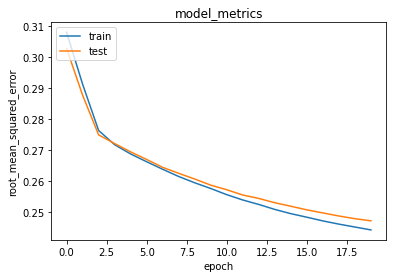

In [29]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Mendapatkan Rekomendasi

In [31]:
movie_df = movie_new
df = pd.read_csv('https://raw.githubusercontent.com/Dikihmd01/Applied-ML/main/dataset/recom_dataset.csv')
 
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
movie_visited_by_user = df[df.user_id == user_id]

movie_not_visited = movie_df[~movie_df['id'].isin(movie_visited_by_user.item_id.values)]['id'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [35]:
# Memeperoleh rekomendasi movie
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_visited_by_user.sort_values(
        by='rating',
        ascending=True
    ).head(5).item_id.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.id)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.id)

Showing recommendations for users: 351
movie with high ratings from user
--------------------------------
In & Out (1997) : 301
Boogie Nights (1997) : 340
Alien: Resurrection (1997) : 343
Soul Food (1997) : 880
Scream 2 (1997) : 895
--------------------------------
Top 10 movie recommendation
--------------------------------
Usual Suspects, The (1995) : 12
Star Wars (1977) : 50
Shawshank Redemption, The (1994) : 64
Silence of the Lambs, The (1991) : 98
Raiders of the Lost Ark (1981) : 174
Good Will Hunting (1997) : 272
Secrets & Lies (1996) : 285
Schindler's List (1993) : 318
Casablanca (1942) : 483
Rear Window (1954) : 603


# Referensi
[1] Machine Learning Terapan, Dicoding

[2] Koren, Yehuda, Steffen Rendle, and Robert Bell. "Advances in collaborative filtering." Recommender systems handbook (2022): 91-142.

[3] Wijaya, Anderias, and Deni Alfian. "Sistem Rekomendasi Laptop Menggunakan Collaborative Filtering Dan Content-Based Filtering." Jurnal Computech & Bisnis 12.1 (2018): 11-27.